In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
# Assuming the dataset is in a CSV format
# load the ECG dataset
df = pd.read_csv('ecg.csv')

# preview data
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [9]:
x = df.iloc[:, :-1].values  # ECG features
y = df.iloc[:, -1].values   # Anomaly labeles 

In [15]:
# Standardize the data (impm for neural networks)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, = train_test_split(x_scaled, test_size =0.2, random_state = 42)

# Reshape data to fit into the autoencoder
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [25]:
# encoder
input_layer = layers.Input(shape=(x_train.shape[1], 1))
x = layers.Conv1D(32, 3, activation='relu', padding='same')(input_layer)
x = layers.MaxPooling1D(2, padding='same')(x)
x = layers.Conv1D(16, 3, activation='relu', padding='same')(x)
encoded = layers.MaxPooling1D(2, padding='same')(x)

#decoder
x = layers.Conv1D(16, 3, activation='relu', padding='same')(encoded)
x = layers.UpSampling1D(2)(x)
x = layers.Conv1D(32, 3, activation='relu', padding='same')(x)
x = layers.UpSampling1D(2)(x)
decoded = layers.Conv1D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_layer, decoded)

encoder = models.Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [29]:
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0000e+00 - loss: 1.1270 - val_accuracy: 0.0000e+00 - val_loss: 0.8286
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.6978 - val_accuracy: 0.0000e+00 - val_loss: 0.7066
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0000e+00 - loss: 0.6535 - val_accuracy: 0.0000e+00 - val_loss: 0.6913
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.6414 - val_accuracy: 0.0000e+00 - val_loss: 0.6867
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.6106 - val_accuracy: 0.0000e+00 - val_loss: 0.6836
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.6236 - val_accuracy: 0.0000e+00 - val_loss: 0.6814
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.6395 - val_accuracy: 0.0000e+00 - val_loss: 0.6797
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - ac

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


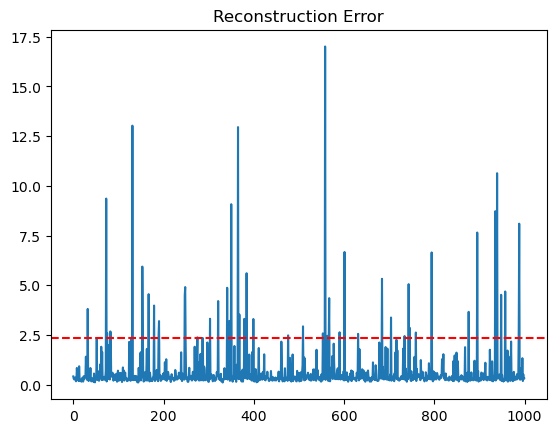

Anomalies detected at indices: [ 32  73  75  82  83 131 153 154 167 179 189 190 247 248 275 303 321 341
 346 350 365 368 379 384 399 476 509 553 558 562 564 567 590 601 631 684
 704 734 743 745 759 794 876 895 935 939 948 957 987 988]


In [33]:
x_test_reconstructed = autoencoder.predict(x_test)

# Compute the reconstruction error (Mean Squared Error)
reconstruction_error = np.mean(np.power(x_test - x_test_reconstructed, 2), axis=1)

# Set a threshold for anomaly detection (e.g., the 95th percentile of the reconstruction error)
threshold = np.percentile(reconstruction_error, 95)

# Detect anomalies (if the error is greater than the threshold)
anomalies = reconstruction_error > threshold

# Visualize the anomalies
plt.plot(reconstruction_error)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title("Reconstruction Error")
plt.show()

# Print the indices of detected anomalies
print("Anomalies detected at indices:", np.where(anomalies)[0])